In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load the dataset
file_path = 'wine-clustering.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Display the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
# Describe function
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# Check for null values 
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
# Skewness
data.skew(numeric_only=True)

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

In [9]:
# Kurtosis
data.kurtosis(numeric_only=True)

Alcohol                -0.852500
Malic_Acid              0.299207
Ash                     1.143978
Ash_Alcanity            0.487942
Magnesium               2.104991
Total_Phenols          -0.835627
Flavanoids             -0.880382
Nonflavanoid_Phenols   -0.637191
Proanthocyanins         0.554649
Color_Intensity         0.381522
Hue                    -0.344096
OD280                  -1.086435
Proline                -0.248403
dtype: float64

In [10]:
# Mean and standard Deviation 
print("Mean of Alcohol Levels:", np.mean(data["Alcohol"]))
print("Standard Deviation of Alcohol Levels:", np.std(data["Alcohol"]))

Mean of Alcohol Levels: 13.00061797752809
Standard Deviation of Alcohol Levels: 0.8095429145285168


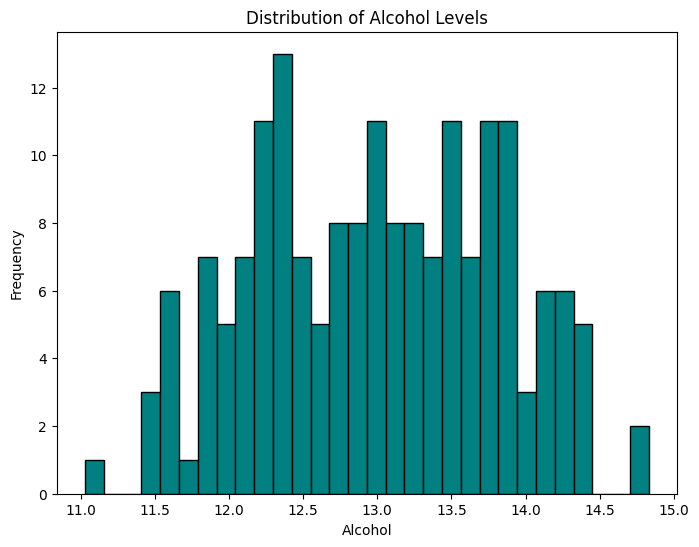

In [ ]:
# Histogram: Distribution of Purchase Amount
def plot_histogram(column):
    # Define figure and hist plot
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=30, color='teal', edgecolor='black')
    plt.title(f'Distribution of {column} Levels')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram('Alcohol')

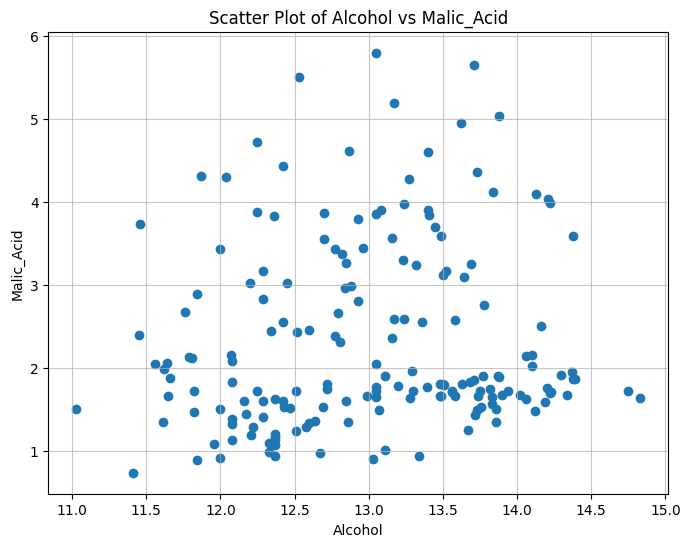

In [ ]:
# Scatter Plot: For two features
def plot_scatter(data, x_feature, y_feature):
    # Define figure and scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_feature], data[y_feature])
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.grid(alpha=0.7)
    plt.show()
    
plot_scatter(data, 'Alcohol', 'Malic_Acid')

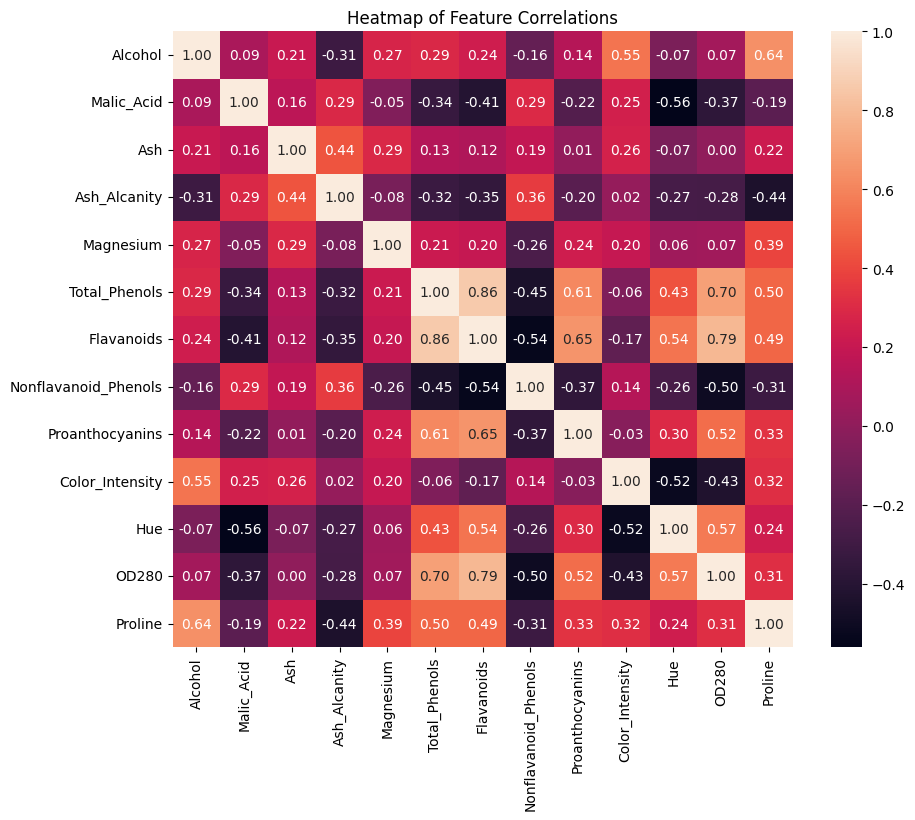

In [ ]:
# Heatmap: Correlation Matrix
def plot_heatmap():
    # Define figure and heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt='.2f', cbar=True)
    plt.title('Heatmap of Feature Correlations')
    plt.show()

plot_heatmap()

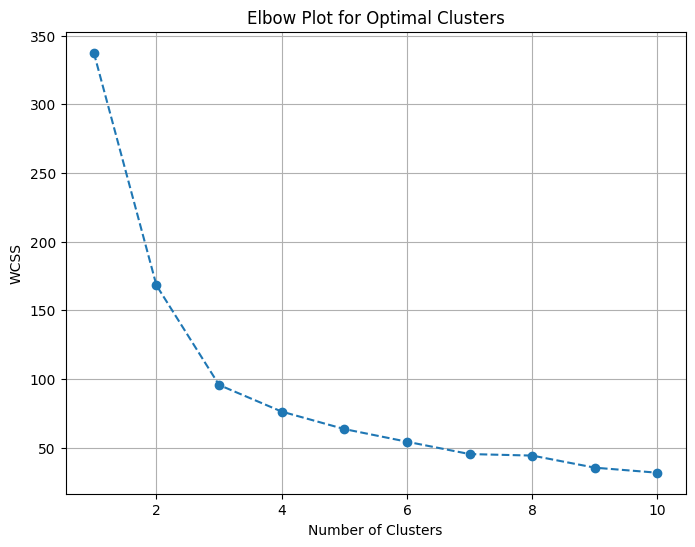

In [ ]:
# Elbow Curve
def elbow_curve(data, features, max_clusters=10):
    # Calculate the wcss
    wcss = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[features])
        wcss.append(kmeans.inertia_)
    # Define figure and elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()

elbow_curve(data, ['Alcohol', 'Malic_Acid'])

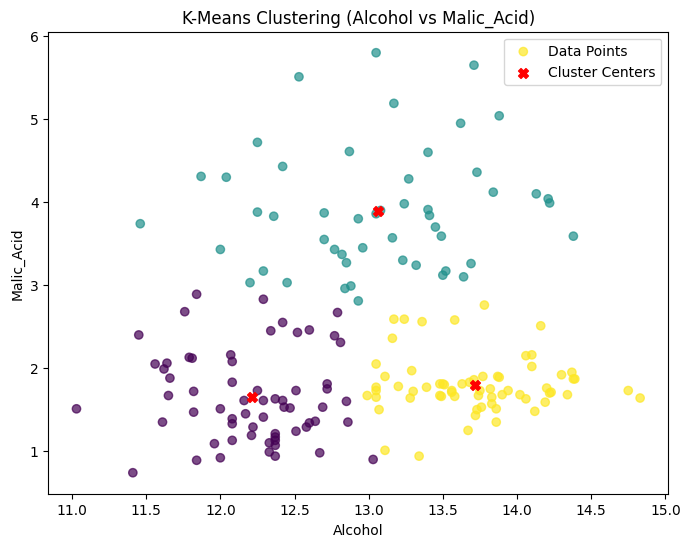

In [ ]:

# KMeans Clustering
def kmeans_clustering(data, features, n_clusters=3):
    # Call Kmeans and make clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data[features])
    data['Cluster'] = clusters
    centers = kmeans.cluster_centers_
    
    # Define figure and scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(data[features[0]], data[features[1]], c=data['Cluster'], cmap='viridis', alpha=0.7, label='Data Points')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, marker='X', label='Cluster Centers')
    plt.title(f'K-Means Clustering ({features[0]} vs {features[1]})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

kmeans_clustering(data, ['Alcohol', 'Malic_Acid'], n_clusters=3)

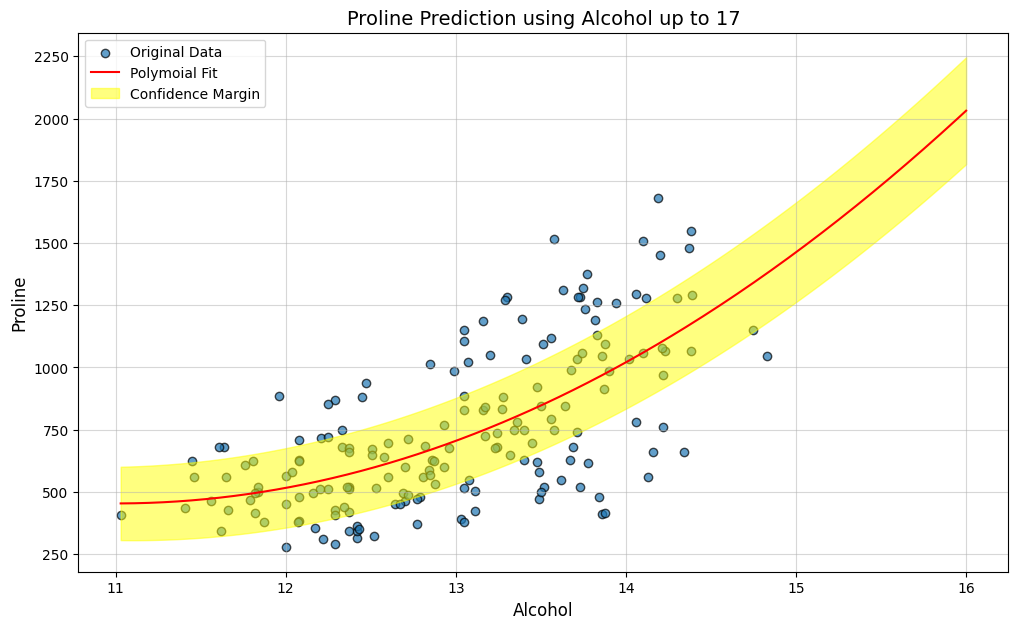

In [18]:
# Define a polynomial function for curve fitting (quadratic: ax^2 + bx + c)
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

def curve_fitting(data, col1, col2):
    # Select features for fitting
    x_data = data[col1]
    y_data = data[col2]

    # Fit the polynomial curve
    params, covariance = curve_fit(polynomial, x_data, y_data)

    # Calculate standard errors for confidence intervals
    perr_alcohol = np.sqrt(np.diag(covariance))

    # Extend the range of predictions up to an Alcohol value of 17
    future_x_alcohol = np.linspace(min(x_data), 16, 300)
    future_y_quad_alcohol = polynomial(future_x_alcohol, *params)

    scale_factor = 0.01
    # Confidence intervals for the extended range
    upper_confidence = polynomial(
        future_x_alcohol, *(params + perr_alcohol * scale_factor)
    )
    lower_confidence = polynomial(
        future_x_alcohol, *(params - perr_alcohol * scale_factor)
    )

    # Generate fitted curve values
    x_fit = np.linspace(min(x_data), max(x_data), 500)
    y_fit = polynomial(x_fit, *params)

    # # Define figure and plot the original data and the fitted curve
    plt.figure(figsize=(12, 7))
    plt.scatter(x_data, y_data, alpha=0.7, label='Original Data', edgecolors='k')
    plt.plot(future_x_alcohol, future_y_quad_alcohol, 'r-', label='Polymoial Fit')
    plt.fill_between(future_x_alcohol, lower_confidence, upper_confidence,
        color='yellow', alpha=0.5, label='Confidence Margin'
    )
    plt.title('Proline Prediction using Alcohol up to 17', fontsize=14)
    plt.xlabel('Alcohol', fontsize=12)
    plt.ylabel('Proline', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

curve_fitting(data, 'Alcohol', 'Proline')
